# k-Means algorithm(PCA를 이용한 차원 축소)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
hw = pd.read_csv(r'C:\Users\arceu\Desktop\homework\hw.csv')
hw_target = hw['target']
hw_features = hw.drop('target', axis=1, inplace=False)

df = pd.DataFrame(data=hw_features, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df.head()

,f1,f2,f3,f4,f5
0,1.030972,-0.449614,0.581358,1.480586,2.511557
1,0.902691,0.372013,1.274705,0.530678,1.433370
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447
3,1.908221,0.360373,2.268593,1.547848,3.456069
4,0.877666,0.153999,1.031665,0.723666,1.601332


In [3]:
hw_scaled = StandardScaler().fit_transform(hw_features) # data 정규화
pca = PCA(n_components=2)
pca.fit(hw_scaled, hw_target)
hw_pca = pca.transform(hw_scaled)

In [4]:
kmeans = KMeans(n_clusters=2, max_iter=3000)
cluster_labels = kmeans.fit_predict(hw_features)

In [5]:
df['cluster'] = kmeans.labels_
df['component1'] = hw_pca[:, 0]
df['component2'] = hw_pca[:, 1]
df.head()

,f1,f2,f3,f4,f5,cluster,component1,component2
0,1.030972,-0.449614,0.581358,1.480586,2.511557,0,1.644055,-1.228175
1,0.902691,0.372013,1.274705,0.530678,1.433370,0,0.688298,0.634505
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447,1,-2.713460,0.232228
3,1.908221,0.360373,2.268593,1.547848,3.456069,0,2.674492,1.468642
4,0.877666,0.153999,1.031665,0.723666,1.601332,0,0.825820,0.089616


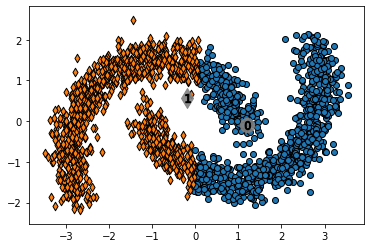

In [6]:
df['KMeans_label'] = cluster_labels
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 'd']

for label in unique_labels:
    label_cluster = df[df['KMeans_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
plt.show()